# Banana Trade Relationships Among Countries

## Christopher Pedersen and Dominic Frerichs
## Professor Aguiar
## MATH1010: Introduction to Networks

In [1]:
# Importing Packages
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
import matplotlib.cm as cmx

In [2]:
# Function for plotting communities in the network
def Plot_Comm(Network, C, position = None):
    cmap = cmx.get_cmap(name='rainbow')
    N = len(Network.nodes())
    K = len(C)
    color_map = ['k']*N
    for i in range(K):
        for j in range(len(C[i])):
            color_map[ C[i][j] ] = cmap(i/K)
    if position is None:
        pos = nx.spring_layout(Network, k=0.25,iterations=20)
    else:
        pos = position
    fig = plt.figure()
    nx.draw(Network, pos, node_color=color_map, node_size=300, edge_color='grey', with_labels=True)
    plt.show()
    return

In [3]:
# Loading in the dataset
folder = ""
file = "FAO_Bananas"
ext = ".npy"
FAO_Bananas = np.load( folder+file+ext )

In [4]:
# Creating the Network
FAO_Bananas_G = nx.to_networkx_graph(FAO_Bananas, create_using=nx.DiGraph)

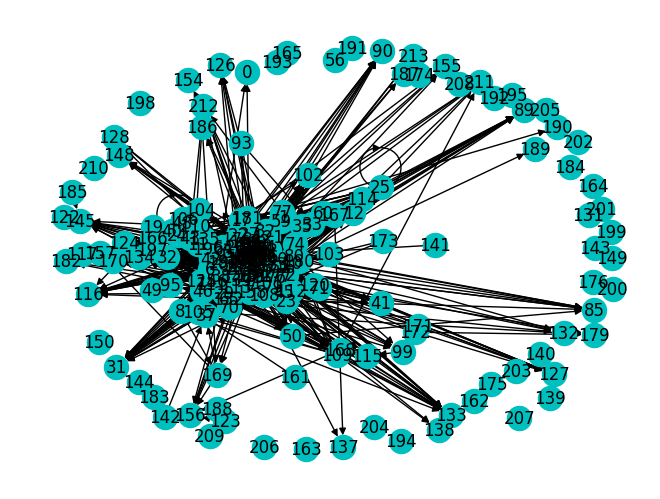

In [5]:
# Positioning and drawing of network (numbers)
pos = nx.spring_layout(FAO_Bananas_G, k=0.4)

nx.draw(FAO_Bananas_G, pos, node_color='c', node_size=300, edge_color='black', with_labels=True)

In [6]:
# Reading in country names
Names = []
with open('fao_trade_names.txt', 'r') as fd:
    lines = fd.readlines()
    for line in lines:
        name = line.split('\n')[0]
        Names.append(name)

In [7]:
# Creating dictionary
names_dictionary = { i : Names[i] for i in range(0, len(Names) ) }

In [8]:
names_dictionary

{0: 'Afghanistan',
 1: 'Australia',
 2: 'Austria',
 3: 'Belgium',
 4: 'Brazil',
 5: 'Canada',
 6: 'China',
 7: 'China,_Hong_Kong_SAR',
 8: 'China,_mainland',
 9: 'China,_Taiwan_Province_of',
 10: 'Denmark',
 11: 'Egypt',
 12: 'Finland',
 13: 'France',
 14: 'Germany',
 15: 'Guatemala',
 16: 'India',
 17: 'Indonesia',
 18: 'Iran_(Islamic_Republic_of)',
 19: 'Iraq',
 20: 'Ireland',
 21: 'Italy',
 22: 'Japan',
 23: 'Kazakhstan',
 24: 'Lebanon',
 25: 'Malaysia',
 26: 'Netherlands',
 27: 'Pakistan',
 28: 'Philippines',
 29: 'Poland',
 30: 'Republic_of_Korea',
 31: 'Russian_Federation',
 32: 'Saudi_Arabia',
 33: 'Singapore',
 34: 'Spain',
 35: 'Sweden',
 36: 'Switzerland',
 37: 'Tajikistan',
 38: 'Thailand',
 39: 'Turkey',
 40: 'Turkmenistan',
 41: 'Ukraine',
 42: 'United_Arab_Emirates',
 43: 'United_Kingdom',
 44: 'United_States_of_America',
 45: 'Uzbekistan',
 46: 'Viet_Nam',
 47: 'Albania',
 48: 'Argentina',
 49: 'Bahamas',
 50: 'Bosnia_and_Herzegovina',
 51: 'Bulgaria',
 52: 'Cabo_Verde',

In [9]:
# Relabeling nodes with country names
FAO_Bananas_G = nx.relabel_nodes(FAO_Bananas_G, names_dictionary)

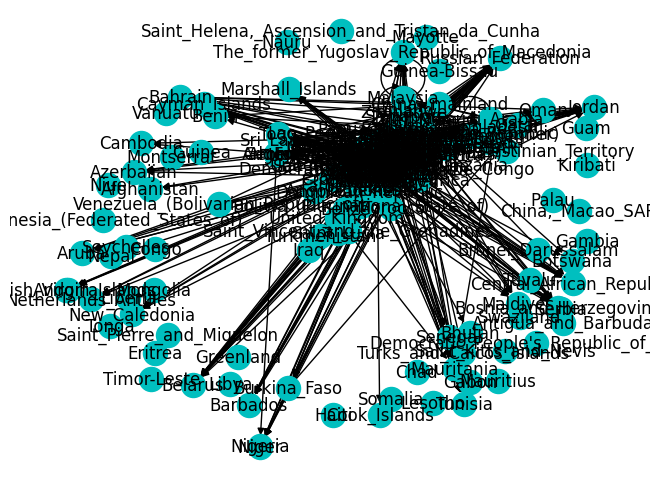

In [12]:
# Positioning and drawing of network (names)
pos_names = nx.spring_layout(FAO_Bananas_G, k=0.01)

nx.draw(FAO_Bananas_G, pos_names, node_color='c', node_size=300, edge_color='black', with_labels=True)